# Imports

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive/comp551_a4/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!nvidia-smi

Sat Dec 14 17:56:15 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [4]:
!pip install git+https://github.com/rtqichen/torchdiffeq

  Cloning https://github.com/rtqichen/torchdiffeq to /tmp/pip-req-build-z0jm7867
  Running command git clone -q https://github.com/rtqichen/torchdiffeq /tmp/pip-req-build-z0jm7867
  Created wheel for torchdiffeq: filename=torchdiffeq-0.0.1-cp36-none-any.whl size=25885 sha256=4c74890d4d99e1dd8b277f6355d4e57665bb40c0321b8190af5ac184083b3797
  Stored in directory: /tmp/pip-ephem-wheel-cache-2x2147k5/wheels/3f/76/69/01867bf3355c3bc8bae7e556b17b44c395b6cda5e76fd8ddc7
Successfully built torchdiffeq


In [0]:
import torch
import torch.optim as optim
import numpy as np
import node_models
import loader
import training
import metrics
import autotune
import config
import pickle

# GPU

In [0]:
device = torch.device("cuda")

# Data Loading

In [0]:
cifar_data_path = './cifar-10-batches-py'

In [0]:
cifar_data = loader.CIFAR(cifar_data_path, 3)
cifar_splits = cifar_data.splits

In [9]:
print("CIFAR STATS")
print("Number of splits:", len(cifar_splits))
print("Number of segments per split (train, val, test):", len(cifar_splits[0]))
print("Info per segment (data, labels):", len(cifar_splits[0][0]))
print("Size of segement (num examples):", len(cifar_splits[0][0][0]))

CIFAR STATS
Number of splits: 3
Number of segments per split (train, val, test): 3
Info per segment (data, labels): 2
Size of segement (num examples): 33334


# Model & Optimizer

In [0]:
model = node_models.NeuralODE
optimizer = optim.Adam

# Training and Evaluation

## CIFAR

### NODE

In [0]:
model_params = config.baseline_config_cifar_node['model']
lr, epochs, batch, workers = config.baseline_config_cifar_node['train']

In [0]:
node_cifar_trainer = training.Trainer(model, optimizer, cifar_data, device)

In [13]:
node_cifar_trainer.train(model_params, lr, epochs, batch, num_workers=6, verbose=True, num_loss=3)

[1,    43] loss: 60.65176
[1,    86] loss: 6.75143
[1,   129] loss: 3.74616
[Fold 1] Epoch:1 Training Acc:0.2002759944801104
[Fold 1] Epoch:1 Validation Acc:0.22236889475579022
[2,    43] loss: 2.73444
[2,    86] loss: 2.35327
[2,   129] loss: 2.15599
[Fold 1] Epoch:2 Training Acc:0.2696946061078778
[Fold 1] Epoch:2 Validation Acc:0.28345133805352213
[3,    43] loss: 2.01772
[3,    86] loss: 1.94178
[3,   129] loss: 1.91828
[Fold 1] Epoch:3 Training Acc:0.3236035279294414
[Fold 1] Epoch:3 Validation Acc:0.31321252850114006
[4,    43] loss: 1.85651
[4,    86] loss: 1.83577
[4,   129] loss: 1.79117
[Fold 1] Epoch:4 Training Acc:0.3611927761444771
[Fold 1] Epoch:4 Validation Acc:0.3574942997719909
[5,    43] loss: 1.77805
[5,    86] loss: 1.74075
[5,   129] loss: 1.74558
[Fold 1] Epoch:5 Training Acc:0.3875022499550009
[Fold 1] Epoch:5 Validation Acc:0.36973478939157567
[6,    43] loss: 1.70014
[6,    86] loss: 1.71545
[6,   129] loss: 1.68363
[Fold 1] Epoch:6 Training Acc:0.4043319133617

In [0]:
pickle.dump( node_cifar_trainer.train_metrics, open( "node_cifar_train.p", "wb" ) )
pickle.dump( node_cifar_trainer.val_metrics, open( "node_cifar_val.p", "wb" ) )

In [15]:
#node_cifar_trainer.test(model_params, 10, 3)

RuntimeError: ignored

In [0]:
#pickle.dump( node_cifar_trainer.test_metrics, open( "cifar_test.p", "wb" ) )

In [0]:
 torch.cuda.empty_cache()

### ANODE

In [0]:
model_params = config.baseline_config_cifar_anode['model']
lr, epochs, batch, workers = config.baseline_config_cifar_anode['train']

In [0]:
anode_cifar_trainer = training.Trainer(model, optimizer, cifar_data, device)

In [19]:
anode_cifar_trainer.train(model_params, lr, epochs, batch, num_workers=6, verbose=True, num_loss=3)

[1,    43] loss: 231.87393
[1,    86] loss: 20.70775
[1,   129] loss: 15.58334
[Fold 1] Epoch:1 Training Acc:0.23090538189236215
[Fold 1] Epoch:1 Validation Acc:0.25837033481339255
[2,    43] loss: 10.26515
[2,    86] loss: 5.89271
[2,   129] loss: 6.63934
[Fold 1] Epoch:2 Training Acc:0.2996340073198536
[Fold 1] Epoch:2 Validation Acc:0.3379335173406936
[3,    43] loss: 4.35359
[3,    86] loss: 3.94889
[3,   129] loss: 3.32063
[Fold 1] Epoch:3 Training Acc:0.3560328793424132
[Fold 1] Epoch:3 Validation Acc:0.3156126245049802
[4,    43] loss: 3.05799
[4,    86] loss: 2.94936
[4,   129] loss: 2.53449
[Fold 1] Epoch:4 Training Acc:0.3867822643547129
[Fold 1] Epoch:4 Validation Acc:0.3262930517220689
[5,    43] loss: 2.45693
[5,    86] loss: 2.26596
[5,   129] loss: 2.11790
[Fold 1] Epoch:5 Training Acc:0.4259914801703966
[Fold 1] Epoch:5 Validation Acc:0.4052562102484099
[6,    43] loss: 1.91131
[6,    86] loss: 1.72854
[6,   129] loss: 1.78296
[Fold 1] Epoch:6 Training Acc:0.47597048059

In [0]:
pickle.dump( anode_cifar_trainer.train_metrics, open( "anode_cifar_train.p", "wb" ) )
pickle.dump( anode_cifar_trainer.val_metrics, open( "anode_cifar_val.p", "wb" ) )

In [0]:
#anode_cifar_trainer.test(model_params, 10, 3)

In [22]:
print(anode_cifar_trainer.val_metrics['loss'])

{'fold1': [0.04352107334720635, 0.01829111151201419, 0.014687662863951692, 0.013179192347900215, 0.00907169922794684, 0.008626348328850756, 0.007189549562039244, 0.006876554721460098, 0.00689538488235849, 0.007218364906471259], 'fold2': [0.043426578104689126, 0.020221954202875148, 0.015181158966024169, 0.018504702027757013, 0.011320547712502982, 0.010619204999675818, 0.009899713148178637, 0.008902943808105718, 0.007929061678839834, 0.007436468780620121], 'fold3': [0.026716945352466197, 0.02152492309638064, 0.012539484657389225, 0.011076848389334744, 0.00919655043724332, 0.013226875748995413, 0.0077840231424274675, 0.007646967122123606, 0.007953546820576132, 0.007415863784667354]}


# Plots

In [0]:
node_cifar_trainer.val_metrics['legend'] = 'NODE'
anode_cifar_trainer.val_metrics['legend'] = 'ANODE'
out_metrics = [node_cifar_trainer.val_metrics, anode_cifar_trainer.val_metrics]

In [0]:
plt = metrics.Plotter(out_metrics)

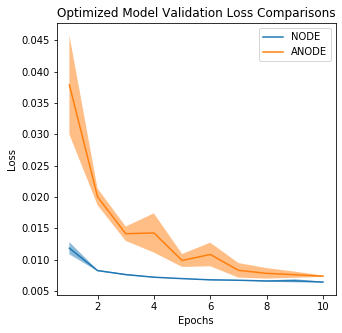

In [25]:
plt.plotLoss("Optimized Model Validation Loss Comparisons")

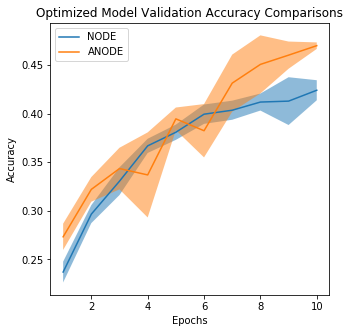

In [26]:
plt.plotAccuracy("Optimized Model Validation Accuracy Comparisons")

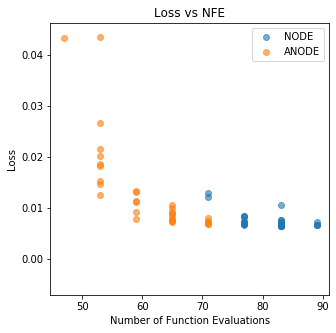

In [27]:
plt.plotNFE("Loss vs NFE", style='loss')

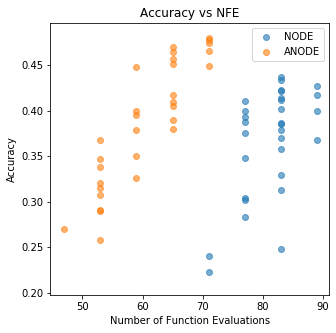

In [28]:
plt.plotNFE("Accuracy vs NFE", style='accuracy')